<a href="https://colab.research.google.com/github/ManchesterBlue/Info301-Week4/blob/main/Code/Info301_Week4_Redesign_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

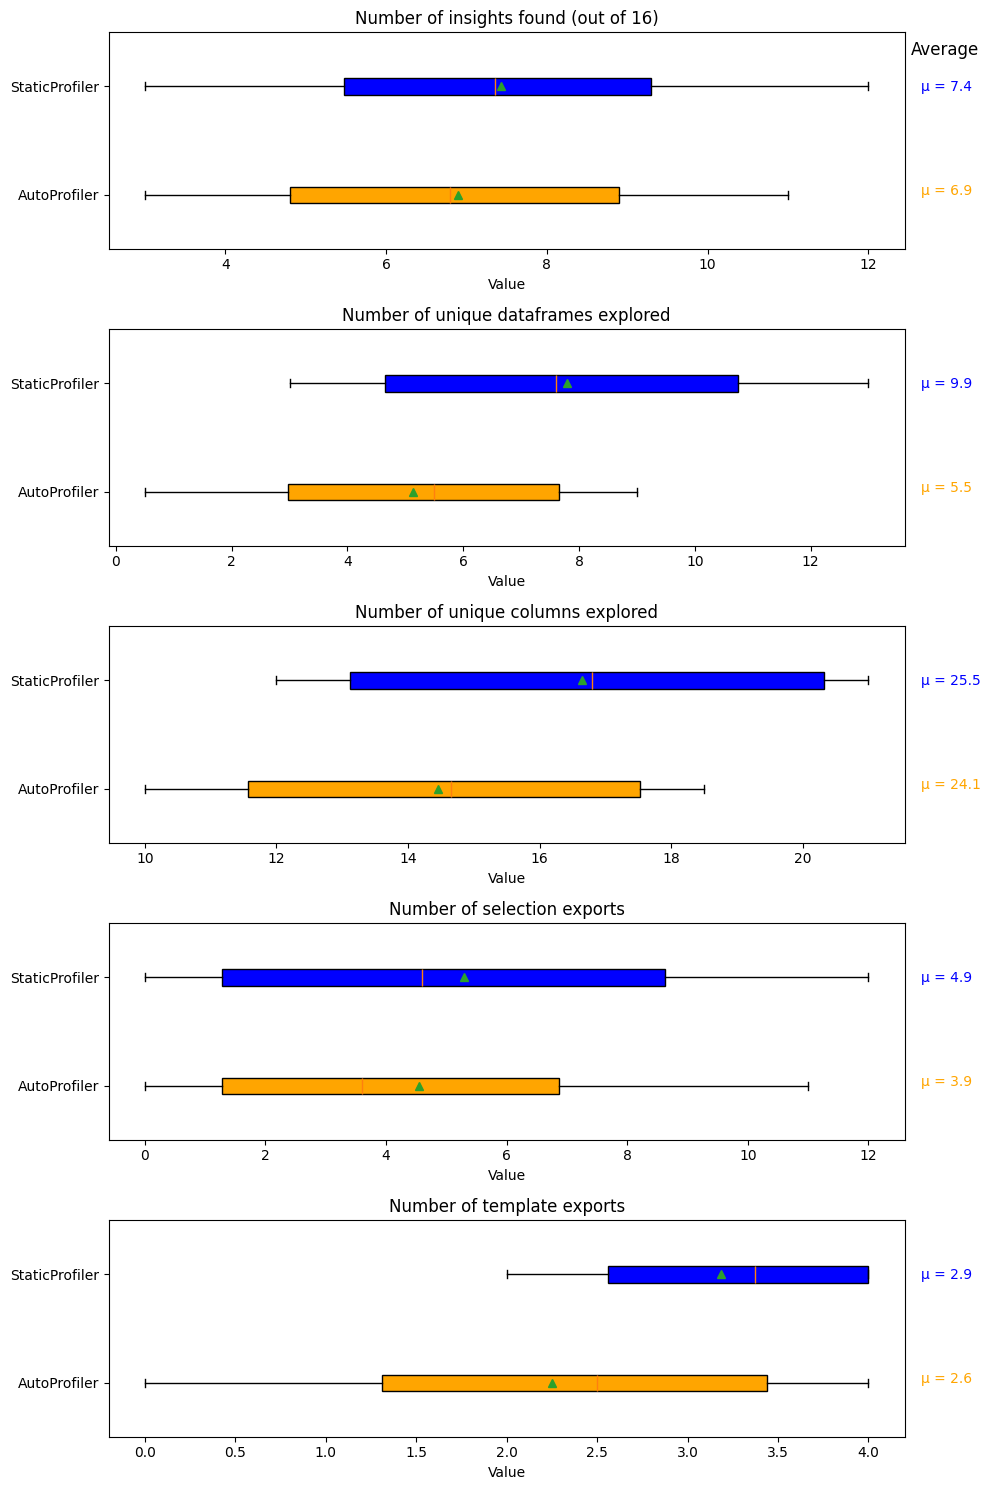

In [ ]:
# Define the updated data with means included for each group
data_with_means = {
    "Number of insights found (out of 16)": {
        "AutoProfiler": [3, 6.3, 8.4, 12],  # AutoProfiler range (line and box)
        "StaticProfiler": [3, 5.4, 8.2, 11],  # StaticProfiler range (line and box)
        "means": [7.4, 6.9]
    },
    "Number of unique dataframes explored": {
        "AutoProfiler": [3, 5.2, 10, 13],
        "StaticProfiler": [0.5, 3.8, 7.2, 9],
        "means": [9.9, 5.5]
    },
    "Number of unique columns explored": {
        "AutoProfiler": [12, 13.5, 20.1, 21],
        "StaticProfiler": [10, 12.1, 17.2, 18.5],
        "means": [25.5, 24.1]
    },
    "Number of selection exports": {
        "AutoProfiler": [0, 1.7, 7.5, 12],
        "StaticProfiler": [0, 1.7, 5.5, 11],
        "means": [4.9, 3.9]
    },
    "Number of template exports": {
        "AutoProfiler": [2, 2.75, 4, 4],
        "StaticProfiler": [0, 1.75, 3.25, 4],
        "means": [2.9, 2.6]
    }
}

fig, axes = plt.subplots(len(data_with_means), 1, figsize=(10, 15), sharex=False)

# Add Average label on top
fig.text(0.95, 0.96, "Average", fontsize=12, color="black", ha="center")

for ax, (title, profilers) in zip(axes, data_with_means.items()):
    bp = ax.boxplot(
        [profilers["StaticProfiler"], profilers["AutoProfiler"]],
        vert=False,  # Horizontal box plot
        patch_artist=True,
        labels=["AutoProfiler", "StaticProfiler"],  # AutoProfiler on top
        showmeans=True,
    )
    # Set colors
    colors = ['blue', 'orange']  # Blue for AutoProfiler, Orange for StaticProfiler
    for patch, color in zip(bp['boxes'], colors[::-1]):  # Match colors to reversed data
        patch.set_facecolor(color)
    for mean, color in zip(bp['means'], colors[::-1]):
        mean.set_color(color)

    # Add average annotations aligned with box plots
    auto_mean, static_mean = profilers["means"]
    ax.text(1.02, 0.73, f"μ = {auto_mean:.1f}", color="blue", fontsize=10, transform=ax.transAxes)
    ax.text(1.02, 0.25, f"μ = {static_mean:.1f}", color="orange", fontsize=10, transform=ax.transAxes)

    ax.set_title(title)
    ax.set_xlabel("Value")

plt.tight_layout()
plt.show()

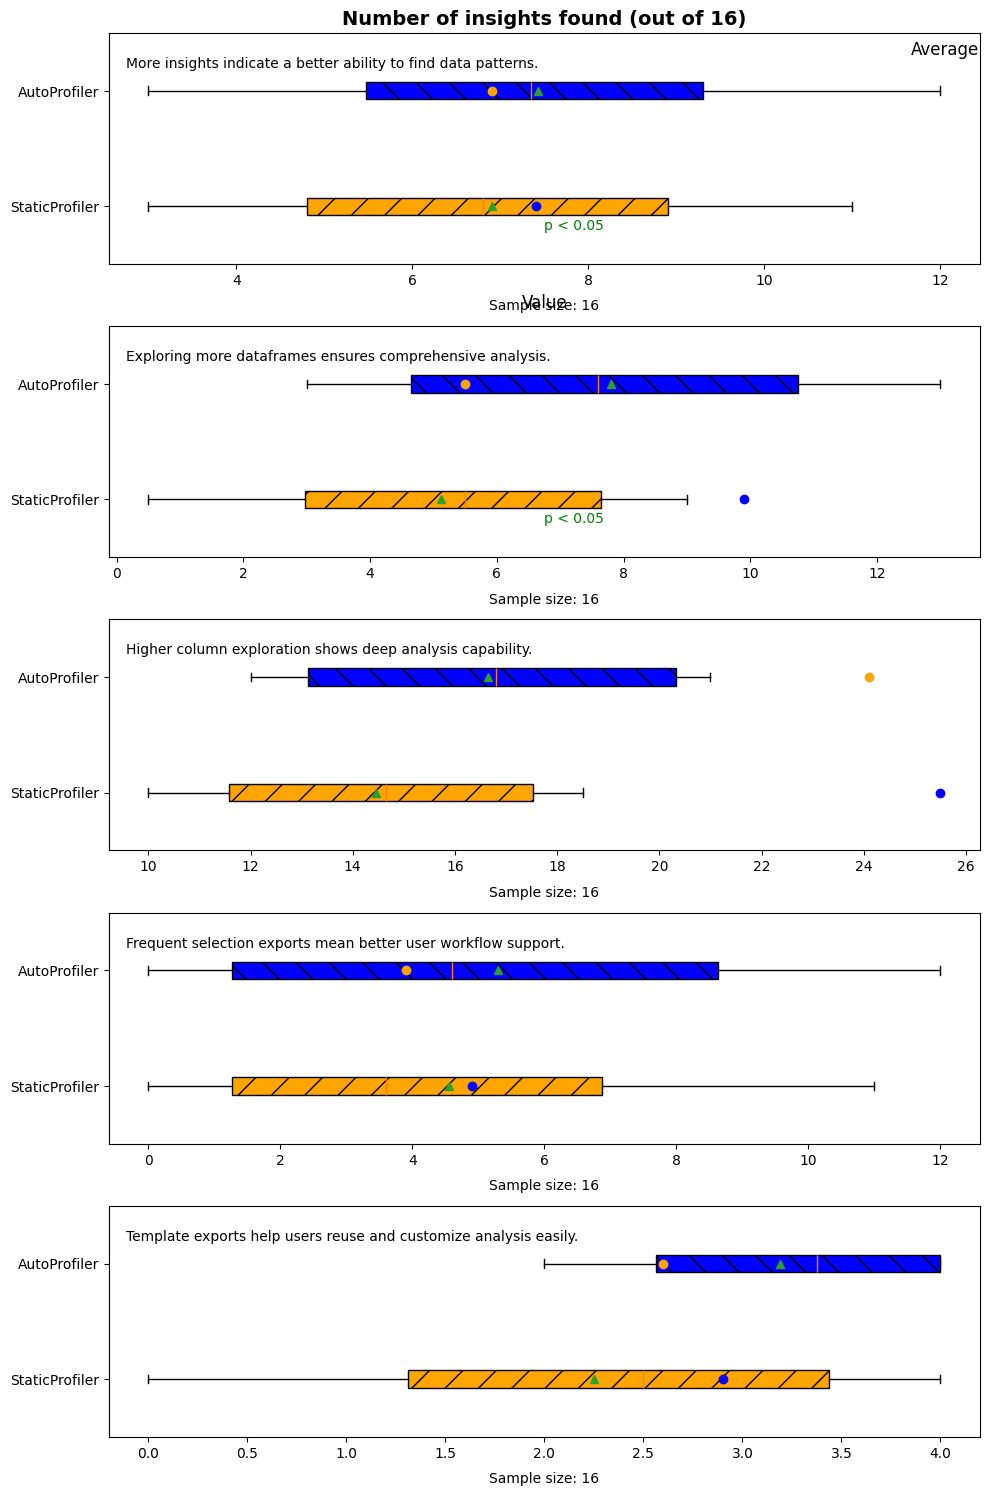

In [ ]:
fig, axes = plt.subplots(len(data_with_means), 1, figsize=(10, 15), sharex=False)

# Add Average label on top
fig.text(0.95, 0.96, "Average", fontsize=12, color="black", ha="center")

# Rearrange order to highlight "Number of insights found"
ordered_titles = [
    "Number of insights found (out of 16)",
    "Number of unique dataframes explored",
    "Number of unique columns explored",
    "Number of selection exports",
    "Number of template exports"
]
data_with_means = {k: data_with_means[k] for k in ordered_titles}

for ax, (title, profilers) in zip(axes, data_with_means.items()):
    bp = ax.boxplot(
        [profilers["StaticProfiler"], profilers["AutoProfiler"]],
        vert=False,  # Horizontal box plot
        patch_artist=True,
        labels=["StaticProfiler", "AutoProfiler"],  # Ensure correct label order
        showmeans=True,
    )
    # Set colors and hatches
    colors = ['blue', 'orange']  # Blue for AutoProfiler, Orange for StaticProfiler
    for patch, color, hatch in zip(bp['boxes'], colors[::-1], ['/', '\\']):
        patch.set_facecolor(color)
        patch.set_hatch(hatch)
    for mean, color in zip(bp['means'], colors[::-1]):
        mean.set_color(color)

    # Add mean markers inside the plots
    auto_mean, static_mean = profilers["means"]
    ax.plot(auto_mean, 1, marker='o', color='blue', label=f"μ = {auto_mean:.1f}")  # AutoProfiler
    ax.plot(static_mean, 2, marker='o', color='orange', label=f"μ = {static_mean:.1f}")  # StaticProfiler

    # Add contextual annotations
    if title == "Number of insights found (out of 16)":
        ax.annotate("More insights indicate a better ability to find data patterns.",
                    xy=(0.02, 0.85), xycoords="axes fraction", fontsize=10, color="black")
    elif title == "Number of unique dataframes explored":
        ax.annotate("Exploring more dataframes ensures comprehensive analysis.",
                    xy=(0.02, 0.85), xycoords="axes fraction", fontsize=10, color="black")
    elif title == "Number of unique columns explored":
        ax.annotate("Higher column exploration shows deep analysis capability.",
                    xy=(0.02, 0.85), xycoords="axes fraction", fontsize=10, color="black")
    elif title == "Number of selection exports":
        ax.annotate("Frequent selection exports mean better user workflow support.",
                    xy=(0.02, 0.85), xycoords="axes fraction", fontsize=10, color="black")
    elif title == "Number of template exports":
        ax.annotate("Template exports help users reuse and customize analysis easily.",
                    xy=(0.02, 0.85), xycoords="axes fraction", fontsize=10, color="black")

    # Highlight key metrics
    if title == "Number of insights found (out of 16)":
        ax.set_title(title, fontsize=14, fontweight="bold")
        ax.set_xlabel("Value", fontsize=12)

    # Add sample size
    ax.text(0.5, -0.2, "Sample size: 16", transform=ax.transAxes,
            fontsize=10, ha="center", color="black")

    # Add statistical significance for selected metrics
    if title in ["Number of insights found (out of 16)", "Number of unique dataframes explored"]:
        ax.text(0.5, 0.15, "p < 0.05", transform=ax.transAxes, fontsize=10, color="green")

plt.tight_layout()
plt.show()